Pokemon Stat Analysis


In [167]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style


<module 'matplotlib.style' from '/home/jinsei/anaconda3/lib/python3.6/site-packages/matplotlib/style/__init__.py'>

In [168]:
data_frame = pd.read_csv('./Pokemon.csv') #reading csv and we save it into a variable
data_frame.head(10) # this line prints first 10 rows of the table



,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [169]:
#change into uppercase
data_frame.columns = data_frame.columns.str.upper().str.replace('_','')

data_frame.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [170]:
#shows legendary pokemons
data_frame[data_frame['LEGENDARY']==True].head()


,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [171]:
#change and set the index to the name attribute
data_frame = data_frame.set_index('NAME')


CLEANING THE DATAFRAME

In [172]:
# the index of mega pokemons contained extra and unneeded text.
#removing all the text before "mega"
data_frame.index = data_frame.index.str.replace(".*(?=Mega)", "")
data_frame.head(10)

,#,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


In [173]:
#prints the columns of dataset
data_frame.columns 

Index(['#', 'TYPE 1', 'TYPE 2', 'TOTAL', 'HP', 'ATTACK', 'DEFENSE', 'SP. ATK',
       'SP. DEF', 'SPEED', 'GENERATION', 'LEGENDARY'],
      dtype='object')

In [174]:
#prints the shape of dataframe
data_frame.shape

(800, 12)

In [175]:
#some values in type two are empty so they have to be filled 
# or deleted

#fill NaN values in TYPE 2 column with corresponding values of TYPE
data_frame['TYPE 2'].fillna((data_frame['TYPE 1']),inplace = True)

data_frame.head(10)


,#,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,Fire,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,Fire,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


In [176]:
# retrieves complete row data from index with value bulbasaur
print(data_frame.loc['Bulbasaur'])
#retrieves complete row date from index 0;integer version of loc
print(data_frame.iloc[0])

#                  1
TYPE 1         Grass
TYPE 2        Poison
TOTAL            318
HP                45
ATTACK            49
DEFENSE           49
SP. ATK           65
SP. DEF           65
SPEED             45
GENERATION         1
LEGENDARY      False
Name: Bulbasaur, dtype: object
#                  1
TYPE 1         Grass
TYPE 2        Poison
TOTAL            318
HP                45
ATTACK            49
DEFENSE           49
SP. ATK           65
SP. DEF           65
SPEED             45
GENERATION         1
LEGENDARY      False
Name: Bulbasaur, dtype: object


In [177]:
# here we filter pokemons using logical operators
data_frame[((data_frame['TYPE 1']=='Fire')| (data_frame['TYPE 1']=='Dragon'))&
          ((data_frame['TYPE 2']=='Dragon')| (data_frame['TYPE 2']=='Fire'))].head()

,#,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Charmander,4,Fire,Fire,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,Fire,405,58,64,58,80,65,80,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Vulpix,37,Fire,Fire,299,38,41,40,50,65,65,1,False
Ninetales,38,Fire,Fire,505,73,76,75,81,100,100,1,False


In [178]:
# returns the pokemon with maximun HP(health power)
print('MAX HP:',data_frame['HP'].argmax())

#pokemon with min HP
print('min HP:',data_frame['HP'].argmin())
# returns pokemon with max defense
print ("max defense:",data_frame['DEFENSE'].argmax())

MAX HP: Blissey
min HP: Shedinja
max defense: Mega Steelix


In [179]:
# sorting the pokemons in the descending order of Totals
data_frame.sort_values('TOTAL',ascending = False).head()

,#,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Mega Rayquaza,384,Dragon,Flying,780,105,180,100,180,100,115,3,True
Mega Mewtwo Y,150,Psychic,Psychic,780,106,150,70,194,120,140,1,True
Mega Mewtwo X,150,Psychic,Fighting,780,106,190,100,154,100,130,1,True
KyogrePrimal Kyogre,382,Water,Water,770,100,150,90,180,160,90,3,True
GroudonPrimal Groudon,383,Ground,Fire,770,100,180,160,150,90,90,3,True


In [180]:
# displays all the unique pokemon types
print("The unique pokemon types are\n",data_frame['TYPE 1'].unique())
#shows count of unique types
data_frame["TYPE 1"].nunique()

The unique pokemon types are
 ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground' 'Fairy'
 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel' 'Flying']


18

In [181]:
#counts different types of pokemons 
data_frame['TYPE 1'].value_counts() ,'\n',data_frame['TYPE 2'].value_counts()
#data_frame.groupby(['TYPE 1']).size()

(Water       112
 Normal       98
 Grass        70
 Bug          69
 Psychic      57
 Fire         52
 Rock         44
 Electric     44
 Ground       32
 Dragon       32
 Ghost        32
 Dark         31
 Poison       28
 Fighting     27
 Steel        27
 Ice          24
 Fairy        17
 Flying        4
 Name: TYPE 1, dtype: int64, '\n', Flying      99
 Water       73
 Psychic     71
 Normal      65
 Grass       58
 Poison      49
 Ground      48
 Fighting    46
 Fire        40
 Fairy       38
 Electric    33
 Dark        30
 Dragon      29
 Ice         27
 Steel       27
 Ghost       24
 Rock        23
 Bug         20
 Name: TYPE 2, dtype: int64)

In [182]:
#summary of pokemon dataframe
data_frame.describe()

,#,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


VISUALIZATION

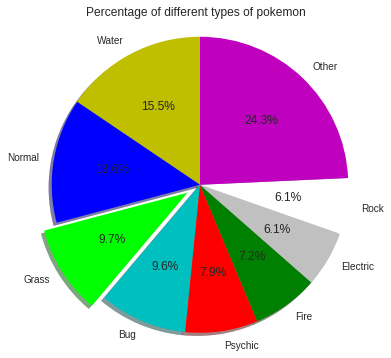

In [183]:
# Distribution of various types of pokemons

labels= 'Water','Normal','Grass','Bug','Psychic','Fire','Electric','Rock','Other'
sizes =[112,98,70,69,57,52,44,44,175]
colors = ['Y','B','#00ff00','C','R','G','silver','white','M']

explode = (0,0,0.1,0,0,0,0,0,0)#only explode the third place
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('Percentage of different types of pokemon')
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


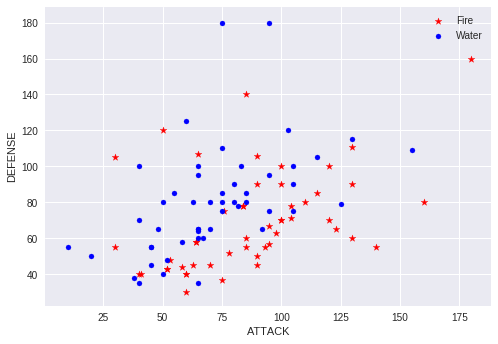

In [184]:
#FIRE VS WATER

#fire contains all fire type pokemons
fire = data_frame[(data_frame['TYPE 1']=='Fire')| ((data_frame['TYPE 2'])=='Fire')]

#water contains all water type pokemons
water = data_frame[(data_frame['TYPE 1']=='Water')| ((data_frame["TYPE 2"])=='Water')]

#scatter plot
plt.scatter(fire.ATTACK.head(50),fire.DEFENSE.head(50),color='R',label = 'Fire',marker='*',s=50)

plt.scatter(water.ATTACK.head(50),water.DEFENSE.head(50),color='B',label='Water',s=25)

plt.xlabel("ATTACK")
plt.ylabel("DEFENSE")
plt.legend()
plt.plot()
#fig = plt.gcf()#get the current figure using .gcf()
#fig.set_size_inches(12,12) #set the size for the figure
plt.show()

This figure shows that fire type pokemons have a better attack than water type pokemons but have a lower defence than water type.


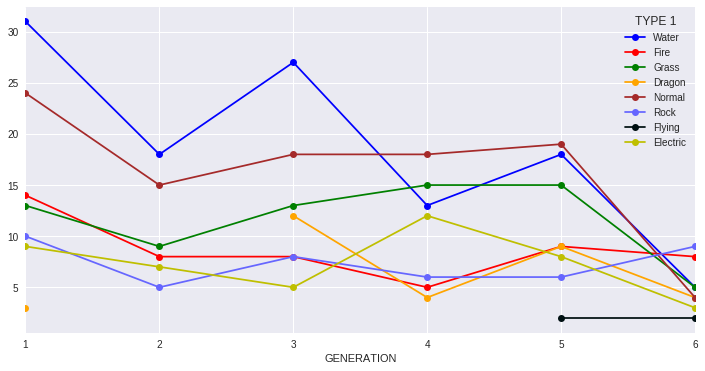

In [185]:
#NUMBER OF POKEMONS BY TYPE AND GENERATIONS

#TYPE 1

a = data_frame.groupby(['GENERATION','TYPE 1']).count().reset_index()
a = a[['GENERATION','TYPE 1','TOTAL']]
a = a.pivot('GENERATION','TYPE 1','TOTAL')
a[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(color= ['b','r','g','#FFA500','brown','#6666ff','#001012','y'],marker='o')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Here in this graph can see that water pokemons had the highest numbers in the 1st Generation. However the number has decreased with passing generations. Similarly Grass type pokemons showed an increase in their numbers till generation 5.

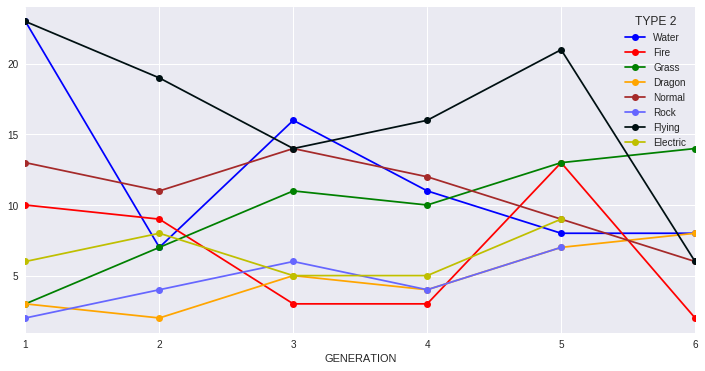

In [186]:
a= data_frame.groupby(['GENERATION','TYPE 2']).count().reset_index()
a=a[['GENERATION','TYPE 2','TOTAL']]
a=a.pivot('GENERATION','TYPE 2','TOTAL')
a[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'],marker = 'o')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

This graph shows that the number of Type2 Grass Pokemons has been steadily increasing. The same is the case for the Dragon Type Pokemons. For other Types the trends are somewhat uneven.